In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [19, 8]

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_df.duplicated().sum()

np.int64(1)

In [10]:
iris_df.drop_duplicates(inplace=True)
iris_df.duplicated().sum()

np.int64(0)

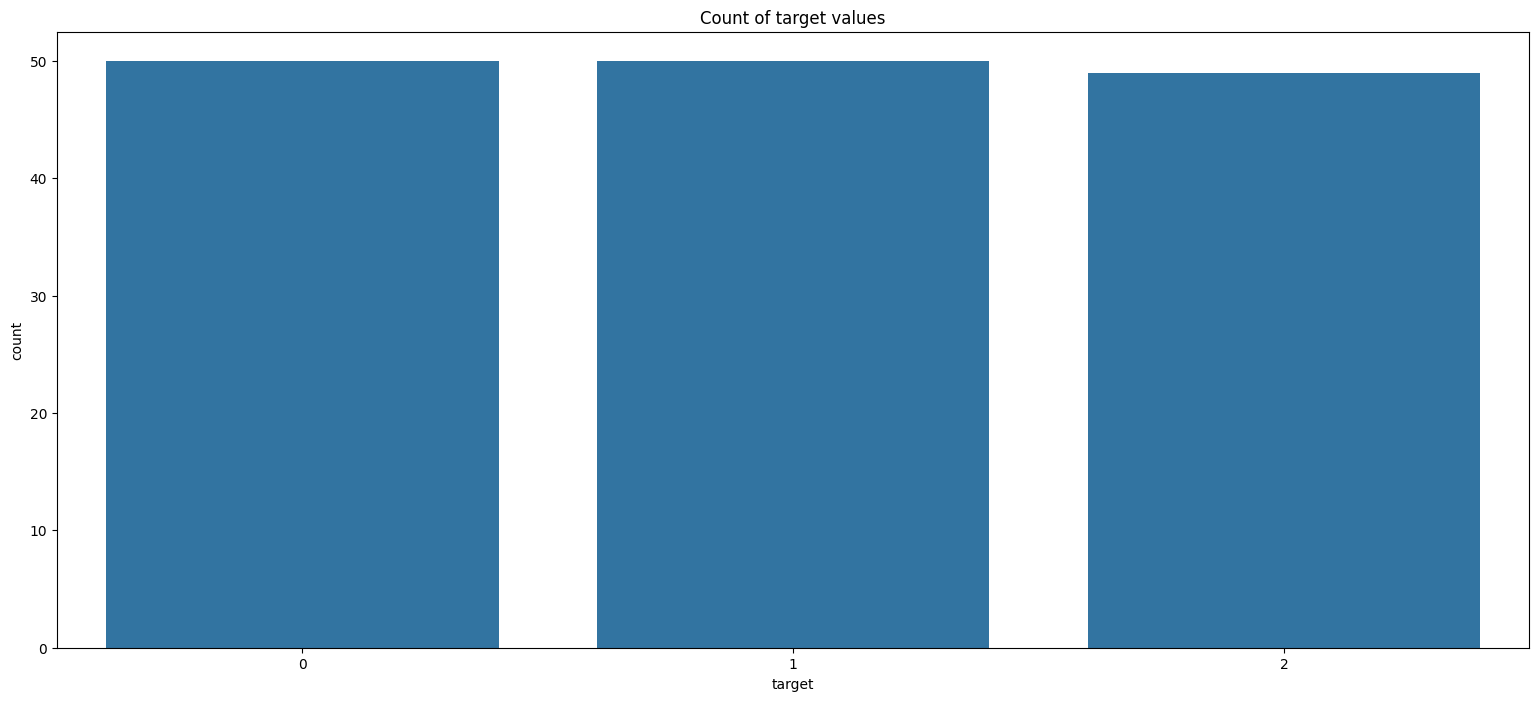

In [11]:
sns.countplot(data=iris_df, x='target')
plt.title("Count of target values")
plt.show()

In [12]:
iris_setosa = iris_df.loc[iris_df['target'] == 0, :]
iris_versicolor = iris_df.loc[iris_df['target'] == 1, :]
iris_virginica = iris_df.loc[iris_df['target'] == 2, :]

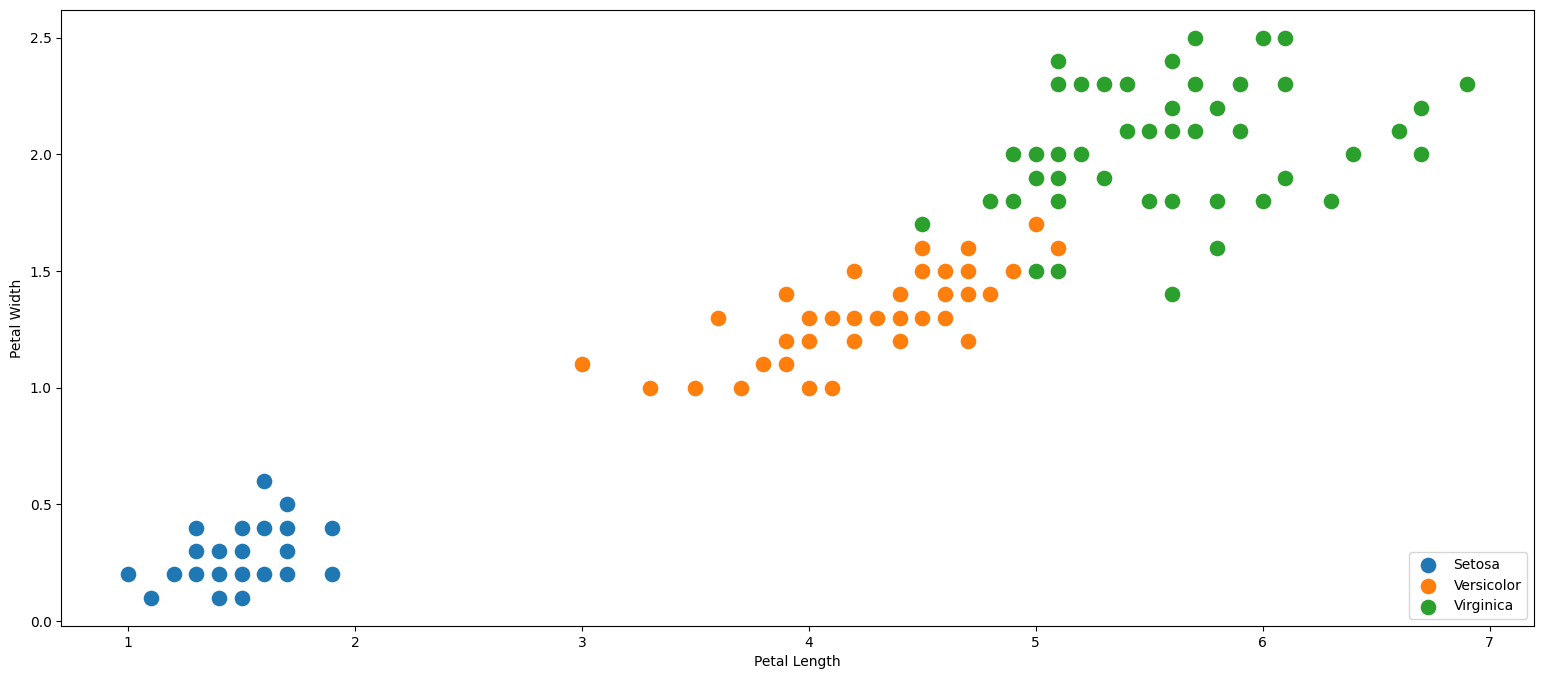

In [13]:
sns.scatterplot(data=iris_setosa, x='petal length (cm)', y='petal width (cm)', s=150)
sns.scatterplot(data=iris_versicolor, x='petal length (cm)', y='petal width (cm)', s=150)
sns.scatterplot(data=iris_virginica, x='petal length (cm)', y='petal width (cm)', s=150)
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

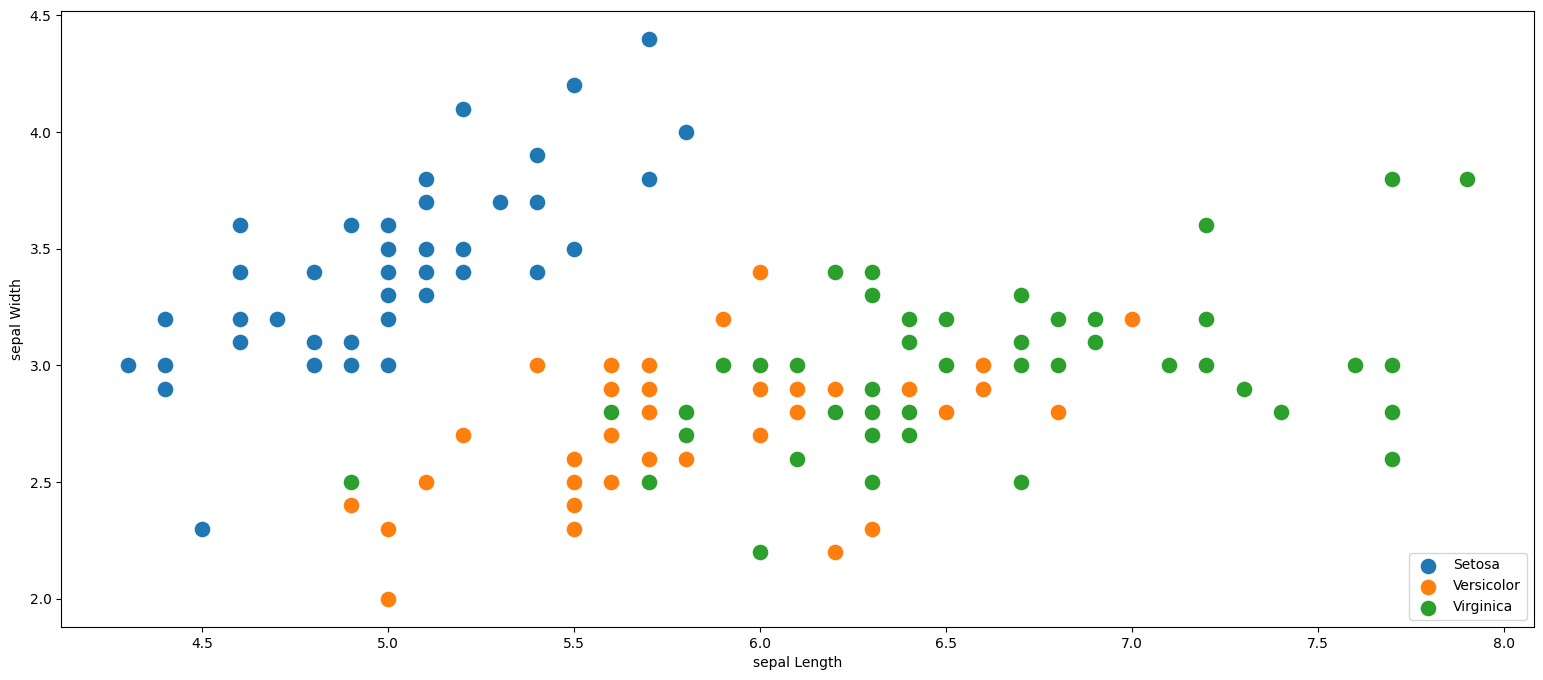

In [14]:
sns.scatterplot(data=iris_setosa, x='sepal length (cm)', y='sepal width (cm)', s=150)
sns.scatterplot(data=iris_versicolor, x='sepal length (cm)', y='sepal width (cm)', s=150)
sns.scatterplot(data=iris_virginica, x='sepal length (cm)', y='sepal width (cm)', s=150)
plt.legend(['Setosa', 'Versicolor', 'Virginica'], loc='lower right')
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')
plt.show()

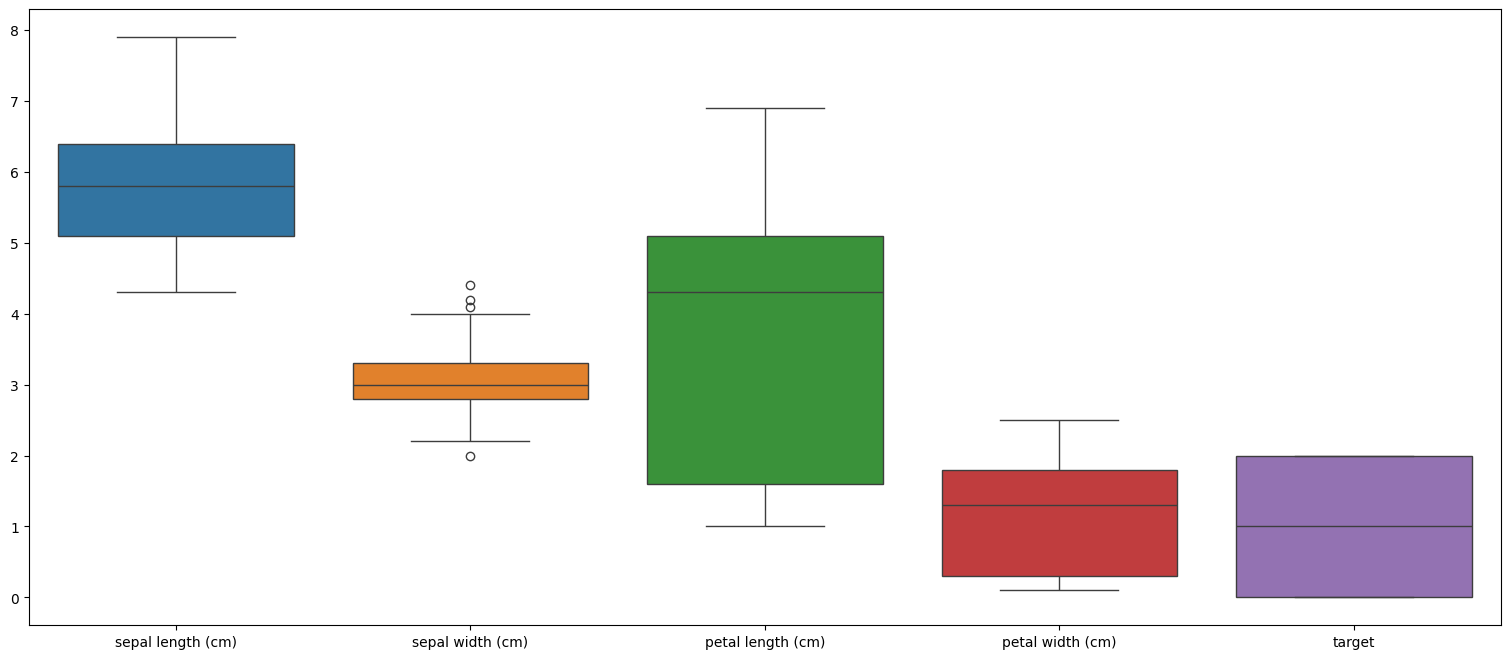

In [15]:
sns.boxplot(iris_df)
plt.show()

In [16]:
# obtain the first quartile
Q1 = iris_df.quantile(0.25)
# obtain the third quartile
Q3 = iris_df.quantile(0.75)
# obtain the IQR
IQR = Q3 - Q1
# print the IQR
print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64


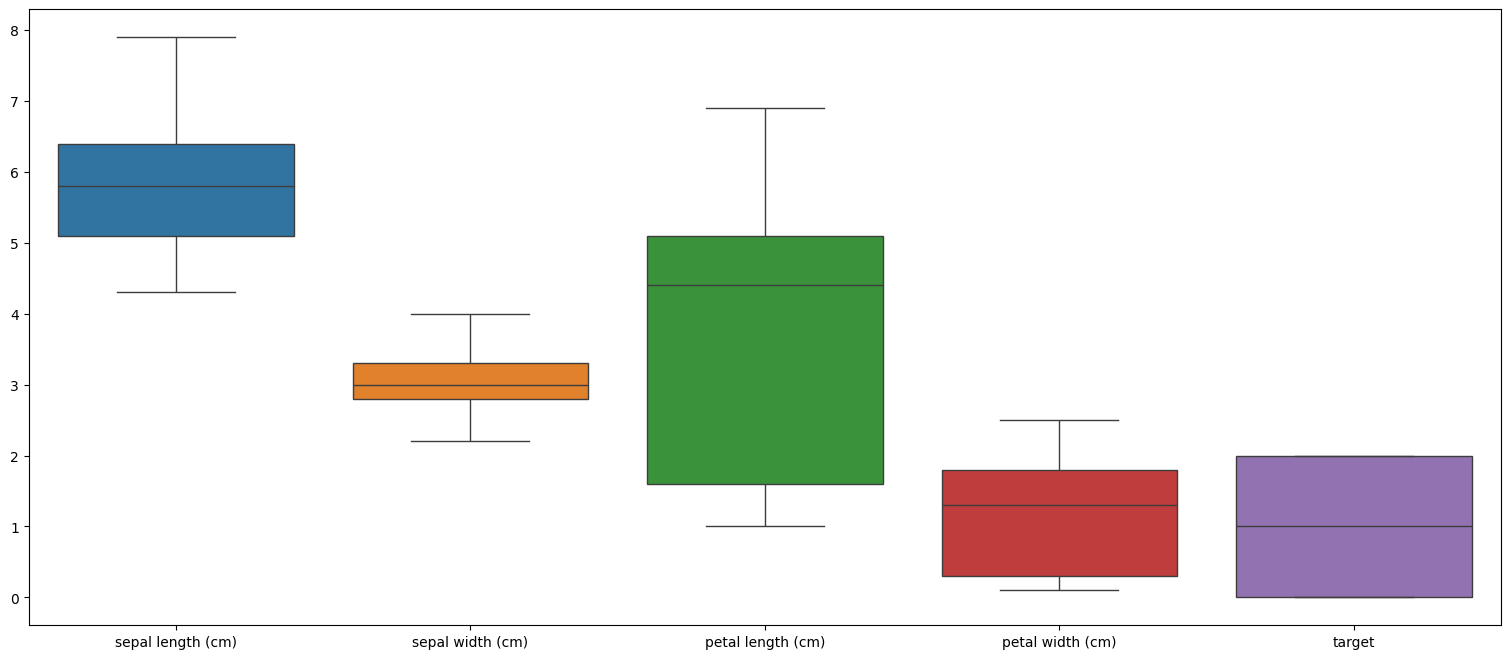

In [17]:
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR
iris_df = iris_df[~((iris_df < ll) |(iris_df > ul)).any(axis=1)]
sns.boxplot(iris_df)
plt.show()

In [18]:
X = iris_df.loc[:, :'petal width (cm)'].values
y = iris_df.loc[:, 'target'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.svm import SVC # Support Vector Classifier

In [22]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
model.score(X_train, y_train)

0.9827586206896551

In [24]:
y_predict = model.predict(X_test)
y_predict

array([0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

In [25]:
y_test

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1])

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[11,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  8]])

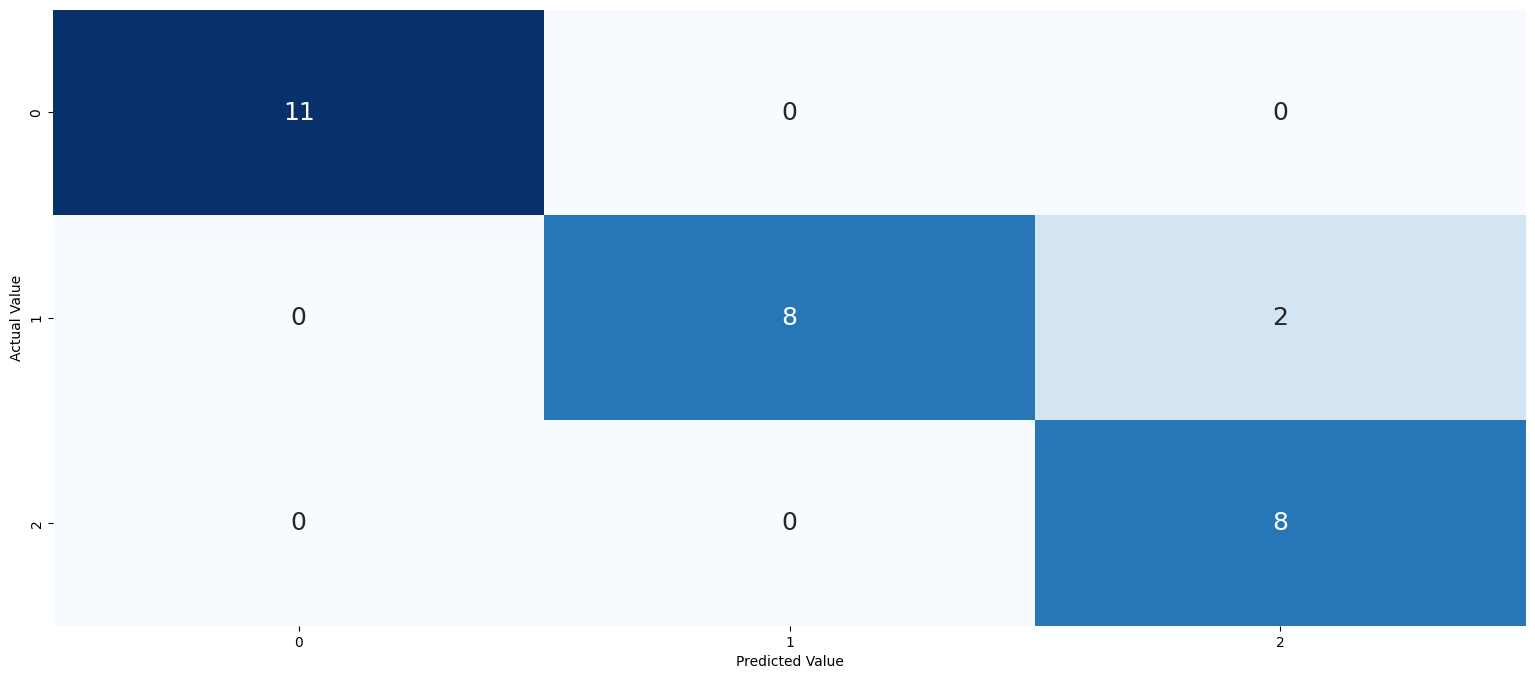

In [27]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={"fontsize":18})
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()